# Лабораторная работа №4
## Швердяков М.А. А-06-21 Вариант 13
## Численное решение задачи Коши

### Задача 1 
Для тестового примера найти приближенное решение задачи Коши для обыкновенного
дифференциального уравнения (ОДУ) 1 порядка 
$$y '=y + s(t) \;\; t∈ [ t_0 ,T ] \;\;\; y (t_0 )= y_0$$
с заданным шагом h=0.1 и вычислить погрешность приближенного решения

ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Построить тестовый пример. Вычислить функцию $s(t)$ по формуле $s(t)=y'(t)-y(t)$.

$$y(t) = \frac{2t}{t^2+1},\;t_0=1$$ $$s(t)=y'(t)-y(t)=\frac{2-2t^2}{(t^2+1)^2} - \frac{2t}{t^2+1}=\frac{-2t^3-2t^2-2t+2}{(t^2+1)^2}$$.

2. Вычислить значение $y_0 = y(t_0)$ в заданной точке $t_0$. Положить значение $T=t_0+1$

$$ y_0=y(1)=\frac{2\cdot1}{1^2+1}=1, \ \ T=t_0+1=2$$

3. Записать задачу Коши в виде: $$y '=f(t, y) \;\; t∈ [ t_0 ,T ] \;\;\; y (t_0 )= y_0$$ где $f(t,y)=y+s(t)$ - правая часть уравнения (1) с найденной функцией $s(t)$.

$$ \begin{cases}
y'=y+\frac{-2t^3-2t^2-2t+2}{(t^2+1)^2}, \ \ t \in [1, 2], \\
y_0=1 \\
\end{cases}$$

4. Используя библиотечную функцию solve_ivp библиотеки scipy.integrate, найти приближенное решение задачи Коши с точностью 1e-10 по методу Рунге-Кутты 4 порядка точности (см. ПРИЛОЖЕНИЕ B) для тестового примера. На одном чертеже построить графики найденных решений для тестового примера.

Точное решение задачи Коши: $y(t)=\frac{2t}{t^2+1}$

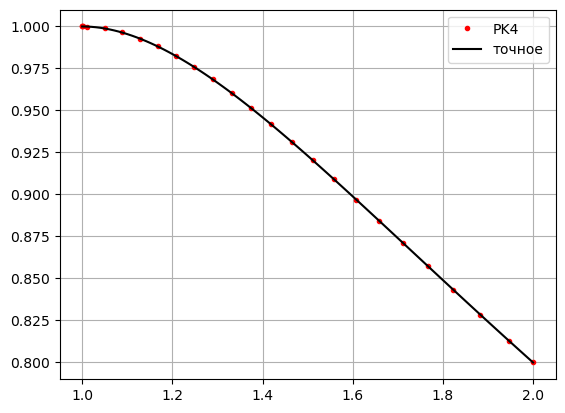

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# Правая часть уравнения
def f(t, y):
    return y + (-2*t**3-2*t**2-2*t+2)/((t**2+1)**2)
# точное решение
def resh(t):
    return (2*t)/(t**2+1)
# решение библиотечной функцией
res1 = solve_ivp(f, t_span=[1,2], y0=[1], method='RK45', atol=1e-10, rtol=1e-10)
# графики
plt.grid(True)
plt.plot(res1['t'], res1['y'][0], color='red', label='PK4', ls='', marker='.', markersize=6)
tt = np.linspace(1, 2, 100)
plt.plot(tt, resh(tt), color='black', label='точное')
plt.legend()

5. Найти величину погрешности по формуле $\varepsilon = \max\limits_{0\leq i\leq N} {|y(t_i)-y_i|}$; здесь $y(t_i)$ и $y_i$ - значения точного и приближенного решений в узлах сетки $t_i,\; i=0,..N$. Для этого решить задачу, передав в параметры библиотечной функции массив точек $t_i$, i=0,..N с шагом h=0.2 (см. ПРИЛОЖЕНИЕ B)

In [2]:
# решение библиотечной функцией с указанием конкретных точек для расчета решения
t = np.linspace(1, 2, 6)
res2 = solve_ivp(f, t_span=[1, 2], y0=[1], method='RK45', t_eval=t, atol=1e-10, rtol=1e-10)

print('t: ', res2['t'])
res22 = res2['y'][0]
print('y: ', res22)

t:  [1.  1.2 1.4 1.6 1.8 2. ]
y:  [1.         0.98360656 0.94594595 0.8988764  0.8490566  0.8       ]


In [3]:
# погрешность
r = np.ndarray(6)
for i in range(6):
    r[i] = abs(res22[i]-resh(t[i]))
print(max(r))

6.514655481737464e-11


6. Сравнить заданную точность расчета адаптивной процедурой (solve_ivp) с абсолютной погрешностью, найденной в п. 5.

1e-10 > 6.514655481737464e-11

## Задача 2
Задача Коши для ОДУ 1 порядка следующего вида
$$ x'=\frac{\alpha - x}{\alpha} \beta x - \gamma x \ , \ t > 0 \\ x(0) = x_0$$
описывает изменение биомассы $x(t)$ любого промыслового вида рыбы в океане. Здесь $\alpha$ - плотность насыщения
(задающая максимально возможное количество биомассы данного вида), $\beta$ - удельная скорость роста биомассы при
$x \approx 0$ , $y$ - постоянная, характеризующая интенсивность промысла.
1. Промоделировать процесс изменения биомассы в зависимости от интенсивности промысла.
2. Определить, при какой интенсивности количество выловленной за время $T = 20$ рыбы $V = \gamma\int_{0}^{T} x(t) \,dt$ является наибольшим. Определить диапазон хищнического лова (т.е. значения интенсивности промысла, при которых вид полностью исчезает).

ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Промасштабировать задачу (2): вводя новые переменные $y=\frac{x}{\alpha}, \ \tau = \beta t$ получить задачу $$y'=y(1-y)-py (3) \\ y(0) = y_0 , \ где \ p=\frac{\gamma}{\beta}, \ y_0=\frac{x_0}{\alpha}$$

$$\beta=1.3, \ \gamma=[0.4, 1.4], \ y_0=0.9$$

2. (A) Решить задачу Коши (3) методом Рунге-Кутты 3-го порядка (вариант 1), на отрезке по времени [0, 50] с шагом h=0.1 при минимальном значении параметра $\gamma$ из указанного в задании диапазона. Приближенно определить по графику момент времени, при котором численность популяции становится вдвое больше (меньше) начальной, а также момент времени, начиная с которого численность стабилизируется.

$\gamma$= min{0.4, 1.4} = 0.4, $\beta=\frac{0.4}{1.3}=0.307692308$

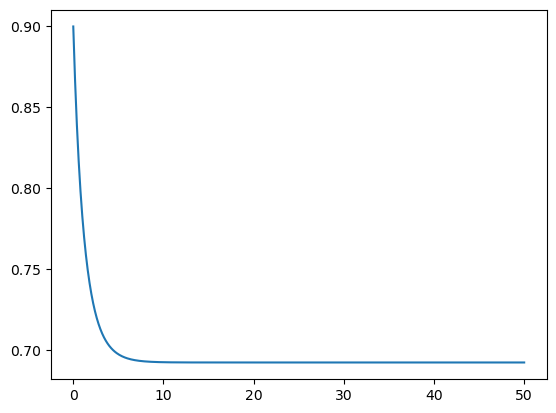

In [10]:
# методом Рунге-Кутты 3-го порядка (вариант 1)
def f(t, y, gamma = 0.4):
    p = gamma / 1.3
    return y * (1 - y) - p * y


def RK4(f, t0, y0, h, N, gamma = 0.4):
    y = np.ndarray(N)
    t = np.ndarray(N)
    y[0] = y0
    t[0] = t0
    for t in range(N - 1):
        K1 = h * f(t, y[t], gamma)
        K2 = h * f(t + h/2, y[t] + K1/2, gamma)
        K3 = h * f(t + h, y[t] - K1 + 2*K2, gamma)
        y[t + 1] = y[t] + 1/6 * (K1 + 4*K2 + K3)
    return y

t0 = 0.1
y0 = 0.9
N = 500
h = 0.1

tt = np.linspace(0, 50, 500)
res = RK4(f, t0, y0, h, N)
plt.plot(tt, res)        

Численность популяции меняется вдвое в t = никогда.
Численность популяции стабилизируется начиная с момента времени t = 8

3. (A, B) Задать множество значений параметра $\gamma$ , изменяя его на заданном отрезке с шагом 0.1. Для каждого значения параметра найти приближенное решение задачи Коши (3) методом Рунге-Кутты 3-го порядка (вариант 1), на отрезке по времени [0, 50] с шагом h=0.1. Построить графики найденных решений при разных значениях параметра $\gamma$ . Определить визуально, при каких значениях параметра происходит исчезновение популяции.

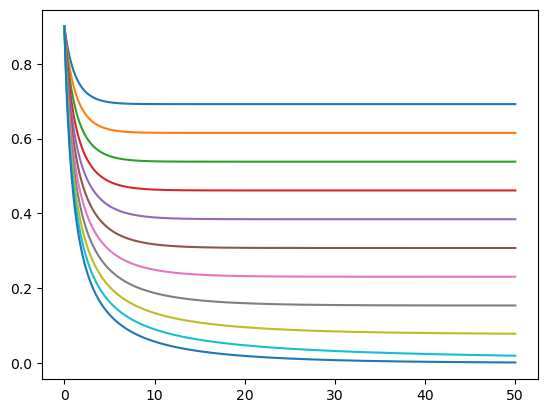

In [13]:
for gamma in range(4, 14 + 1):
    res = RK4(f, t0, y0, h, N, gamma / 10)
    plt.plot(tt, res)        

Исчезновение популярности происходит при значении параметра $\gamma = 1.3$

4. (A, B) Взяв вдвое больший шаг h1=0.2, снова найти решение задачи тем же методом для тех же значений
параметра $\gamma$ . Используя полученные решения, рассчитать оценки погрешности по правилу Рунге.

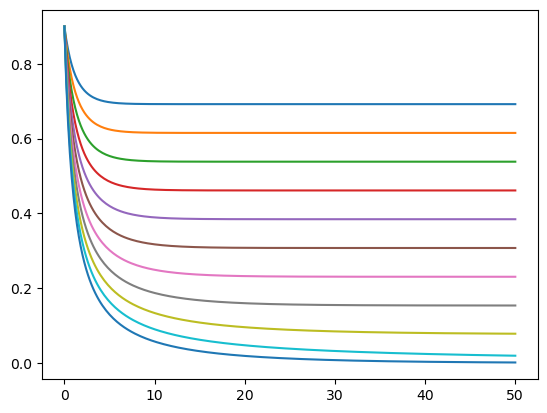

In [26]:
tt2 = np.linspace(0, 50, N // 2)
for gamma in range(4, 14 + 1):
    res = RK4(f, t0, y0, h, N, gamma / 10)
    res2 = RK4(f, t0, y0, 0.2, N // 2, gamma / 10)
    mx = abs(res[0] - res2[0])
    for i in range(1, 250):
        mx = max(mx, abs(res[i*2] - res2[i]))
    #print('гамма =', gamma / 10, 'оценка по рунге =', mx / 3)
    plt.plot(tt2, res2) 

| $\gamma$ | Оценка по Рунге |
|-------|-----------------|
| 0.4   | 6.006588793646313e-06 |
| 0.5   | 8.413229232654787e-06 |
| 0.6   | 1.105998394882827e-05 |
| 0.7   | 1.4315477787407715e-05 |
| 0.8   | 1.8127200472450866e-05 |
| 0.9   | 2.261156147572348e-05 |
| 1.0   | 2.789489859592968e-05 |
| 1.1   | 3.450431517830014e-05 |
| 1.2   | 4.251541290356542e-05 |
| 1.3   | 5.195301215554782e-05 |
| 1.4   | 6.299856407162203e-05 |

In [ ]:
# када исчезновение популяции??